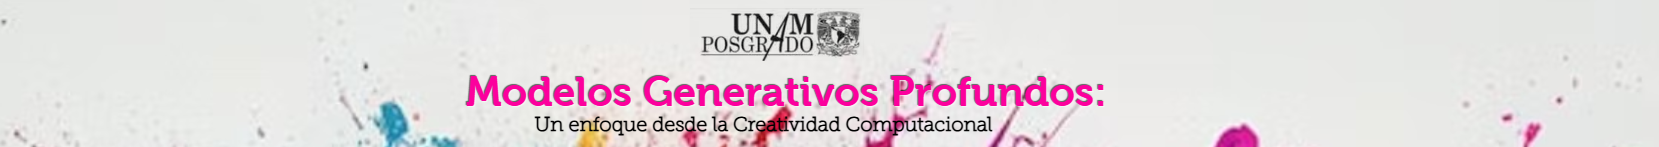


#CLIP Embeddings —
###Explorando el espacio conjunto texto-imagen

Este notebook permite experimentar con **CLIP (Contrastive Language-Image Pretraining)**, el modelo base que define el espacio multimodal compartido entre texto e imagen. DALL·E 2 aprovecha únicamente el text encoder de CLIP para generar embeddings de texto ya alineados con ese espacio visual.



### Objetivos didácticos
- Comprender cómo se codifican textos e imágenes en vectores comparables.
- Medir la similitud entre descripciones y contenidos visuales.
- Visualizar las relaciones semánticas en un espacio 2D (PCA).


###1. Instalar CLIP

###2. Importar librerías

In [ ]:
import torch, clip
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd


###3. Carga de imágenes y descripciones

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Ejercicio 1: animales
# CLIP suele agrupar las imágenes de “dog” y “cat” cerca de “pet” y “domestic animal”, mientras “lion” se aproxima más a “wild animal”.
def carga_imagenes_ejercicio1():
    # Carpeta donde guardaste tus imágenes
    base_dir = "/content/drive/MyDrive/Colab Notebooks/CursoIAGenerativa/notebooks/Clase22_ModelosMultimodales/Imagenes1"

    # Archivos locales en tu carpeta
    image_paths = [
        f"{base_dir}/leon1.jpg",
        f"{base_dir}/leon2.jpg",
        f"{base_dir}/leon3.jpg",
        f"{base_dir}/leon4.jpg",
        f"{base_dir}/leon5.jpg",
        f"{base_dir}/gato1.jpg",
        f"{base_dir}/gato2.jpg",
        f"{base_dir}/gato3.jpg",
        f"{base_dir}/gato4.jpg",
        f"{base_dir}/gato5.jpg",
        f"{base_dir}/perro1.jpg",
        f"{base_dir}/perro2.jpg",
        f"{base_dir}/perro3.jpg",
        f"{base_dir}/perro4.jpg",
        f"{base_dir}/perro5.jpg"
    ]

    # Prompts de texto para asociar
    text_prompts = [
        "a lion",
        "a cat",
        "a dog",
        "a wild animal",
        "a domestic animal",
        "a pet"
    ]

    return image_paths, text_prompts


In [ ]:
#Ejercicio 2: diferentes tipos de medios de transporte
#El embedding de “bus” tiende a asociarse más con “public transportation”, mientras “bicycle” se separa semánticamente hacia objetos individuales o “a road scene”.
def carga_imagenes_ejercicio2():
    # Carpeta donde guardaste tus imágenes
    base_dir = "/content/drive/MyDrive/Colab Notebooks/CursoIAGenerativa/notebooks/Clase22_ModelosMultimodales/Imagenes2"

    # Archivos locales en tu carpeta
    image_paths = [
        f"{base_dir}/auto1.jpg",
        f"{base_dir}/auto2.jpg",
        f"{base_dir}/auto3.jpg",
        f"{base_dir}/auto4.jpg",
        f"{base_dir}/auto5.jpg",
        f"{base_dir}/bus1.jpg",
        f"{base_dir}/bus2.jpg",
        f"{base_dir}/bus3.jpg",
        f"{base_dir}/bus4.jpg",
        f"{base_dir}/bus5.jpg",
        f"{base_dir}/bicicleta1.jpg",
        f"{base_dir}/bicicleta2.jpg",
        f"{base_dir}/bicicleta3.jpg",
        f"{base_dir}/bicicleta4.jpg",
        f"{base_dir}/bicicleta5.jpg"
    ]

    # Prompts de texto para asociar
    text_prompts = [
        "a car",
        "a bus",
        "a bicycle",
        "a vehicle",
        "public transportation",
        "a road scene"
    ]
    return image_paths, text_prompts


In [ ]:
def mostrar_imagenes(image_paths, cols=None, figsize=(12, 6)):
    """
    Despliega en una cuadrícula las imágenes cargadas.

    Parámetros:
    - image_paths: lista de rutas a archivos de imagen.
    - cols: número de columnas (opcional). Si no se especifica, se calcula automáticamente.
    - figsize: tamaño de la figura en pulgadas.
    """
    total = len(image_paths)
    if total == 0:
        print("No hay imágenes para mostrar.")
        return

    # Calcular columnas automáticamente
    if cols is None:
        cols = min(5, total)  # hasta 5 columnas máximo
    rows = (total + cols - 1) // cols

    plt.figure(figsize=figsize)

    for i, path in enumerate(image_paths):
        plt.subplot(rows, cols, i + 1)
        try:
            img = Image.open(path)
            plt.imshow(img)
            plt.axis("off")
        except UnidentifiedImageError:
            plt.text(0.5, 0.5, "Imagen no válida", ha="center", va="center", fontsize=9)
            plt.axis("off")

    plt.tight_layout()
    plt.show()



In [ ]:
# Carga y muestra las imágenes de ejemplo (puedes reemplazarlas por otras)
image_paths, text_prompts = carga_imagenes_ejercicio1()
mostrar_imagenes(image_paths)


###4. Obtención de embeddings de texto e imagen

In [ ]:
# Selección del dispositivo y carga del modelo CLIP



In [ ]:
# Preprocesamiento de las imágenes


# Preprocesamiento de los prompts



In [ ]:
print(text_prompts[0])
print(texts[0])

In [ ]:
# Generar los embeddings de imagen y texto con CLIP, y luego normalizarlos
# para que puedan compararse dentro del mismo espacio latente.



# Normalización


###5. Cálculo de similitud entre texto e imagen

In [ ]:
# Calcular la similitud entre embeddings de imagen y texto
# - image_features @ text_features.T es el producto punto
# - Se multiplica por 100 para amplificar los valores de similitud antes de aplicar el softmax.




In [ ]:
# Crear etiquetas automáticas a partir de las rutas de imagen
# (solo el nombre del archivo, sin la ruta completa)
image_labels = [path.split("/")[-1] for path in image_paths]

# Crear DataFrame de forma dinámica
df = pd.DataFrame(similarity, columns=text_prompts, index=image_labels)

# Mostrar con formato y gradiente de color
display(df.style.background_gradient(cmap="Blues").format("{:.2f}"))



###6. Visualización del espacio latente con PCA

Cada punto del gráfico es un vector de características (embedding) que CLIP ha generado para:

una imagen (puntos azules 🟦), o

una descripción textual (puntos naranjas 🟧).

CLIP los entrena para que ambos tipos de datos —imagen y texto— vivan en un mismo espacio semántico.
En ese espacio, cosas que “significan lo mismo” están cerca, aunque sean de modalidades distintas.

In [ ]:
# Reducir embeddings (funciona con cualquier número de imágenes o textos)
pca = PCA(n_components=2)
all_embeddings = torch.cat([image_features, text_features]).cpu().numpy()
reduced = pca.fit_transform(all_embeddings)

# Crear etiquetas dinámicamente
image_labels = [f" {path.split('/')[-1]}" for path in image_paths]
text_labels = [f" {t}" for t in text_prompts]
labels = image_labels + text_labels

# Asignar colores automáticos
colors = (["royalblue"] * len(image_paths)) + (["darkorange"] * len(text_prompts))

# Gráfico
plt.figure(figsize=(9, 7))
for i, (x, y) in enumerate(reduced):
    plt.scatter(x, y, color=colors[i], s=80, edgecolors="k", alpha=0.7)
    plt.text(x + 0.02, y + 0.02, labels[i], fontsize=9)

plt.title("Proyección PCA — Espacio Latente CLIP (Imágenes vs Texto)", fontsize=14)
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


###Conclusión
Este ejercicio permite observar cómo CLIP alinea descripciones textuales e imágenes dentro de un mismo espacio latente. Los embeddings más cercanos reflejan mayor similitud semántica.